In [ ]:
# get odis_male_json from cricsheet, put it in data/odis_male_json

In [1]:
import os
import json

# Directory containing the JSON files
directory = 'data/odis_male_json'

# List to store the data from all JSON files
data = []

# Iterate over every file in the directory
for filename in os.listdir(directory):
    # Check if the file is a JSON file
    if filename.endswith('.json'):
        # Construct the full file path
        filepath = os.path.join(directory, filename)
        # Open the file
        with open(filepath, 'r') as file:
            # Load the JSON data
            json_data = json.load(file)
            # Append the data to the list
            data.append(json_data)

In [2]:
len(data)

2408

In [3]:
from datetime import datetime

# Function to extract the date from a data item
def get_date(item):
    try:
        date_str = item['info']['dates'][0]
        return datetime.strptime(date_str, '%Y-%m-%d')
    except Exception:
        return None

# Create a new list with only the items that have a valid date
data_with_dates = [item for item in data if get_date(item) is not None]

# Create a new sorted list
data_sorted = sorted(data_with_dates, key=get_date)

In [4]:
len(data_sorted)

2408

In [5]:
# Initialize an empty dictionary
player_dict = {}

# Iterate over all items in the data
for item in data:
    # Get the player registry for the current item
    registry = item['info']['registry']['people']
    
    # Iterate over all players in the registry
    for name, id in registry.items():
        # If the player's ID is not already a key in the dictionary, add it with an empty list as the value
        if id not in player_dict:
            player_dict[id] = []
        
        # If the player's name is not already in the list for their ID, add it
        if name not in player_dict[id]:
            player_dict[id].append(name)

In [6]:
len(player_dict)

2181

In [36]:
# # save player dict in data/players.json
# with open('data/players.json', 'w') as file:
#     json.dump(player_dict, file)
    

In [7]:
# List to store the number of deliveries in each match
deliveries_per_match = []

# Iterate over all items in the data
for item in data:
    # Initialize the count for the current match
    match_count = 0
    
    # Iterate over all innings in the item
    for innings in item['innings']:
        # Iterate over all overs in the innings
        for over in innings['overs']:
            # Add the number of deliveries in the over to the match count
            match_count += len(over['deliveries'])
    
    # Add the match count to the list
    deliveries_per_match.append(match_count)

# Calculate the total number of deliveries in the dataset
total_deliveries = sum(deliveries_per_match)

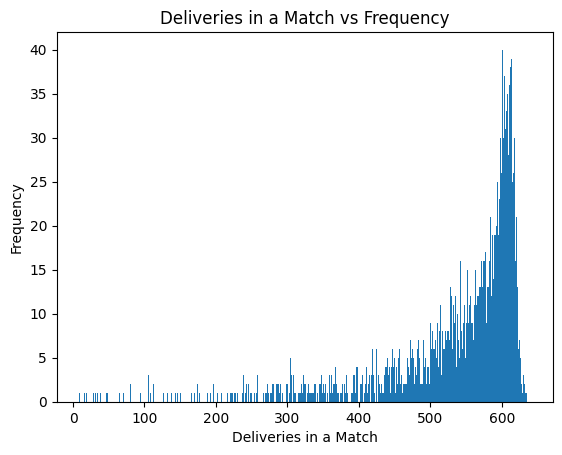

In [8]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(deliveries_per_match, bins=range(min(deliveries_per_match), max(deliveries_per_match) + 1))

# Set the title and labels
plt.title('Deliveries in a Match vs Frequency')
plt.xlabel('Deliveries in a Match')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [9]:
total_deliveries

1280571

In [10]:
# # find all players who may have 'Kohli' in their name
# for id, names in player_dict.items():
#     for name in names:
#         if 'Kohli' in name:
#             print(id, name)

# List to store the data for each delivery
delivery_data = []

# Iterate over all items in the data
for item in data_sorted:
    # Get the date of the match
    match_date = get_date(item)
    # convert match_date to string
    match_date = match_date.strftime('%Y-%m-%d')
    
    # Iterate over all innings in the item
    for innings in item['innings']:
        # Iterate over all overs in the innings
        for over in innings['overs']:
            # Iterate over all deliveries in the over
            for delivery in over['deliveries']:
                # Create a dictionary with the required keys
                delivery_dict = {
                    'date': match_date,
                    'batter_id': item['info']['registry']['people'][delivery['batter']],
                    'bowler_id': item['info']['registry']['people'][delivery['bowler']],
                    'runs': delivery['runs'],
                    'wickets': delivery['wickets'] if 'wickets' in delivery else [],
                }
                
                # Append the dictionary to the list
                delivery_data.append(delivery_dict)

In [50]:
delivery_data[-1]

{'date': '2023-10-28',
 'batter_id': 'ef18b66e',
 'bowler_id': '4557dc54',
 'runs': {'batter': 0, 'extras': 0, 'total': 0},
 'wickets': [{'player_out': 'Taskin Ahmed',
   'fielders': [{'name': 'BFW de Leede'}],
   'kind': 'caught'}]}

In [51]:
# # write delivery data to file
# with open('data/deliveries.json', 'w') as file:
#     json.dump(delivery_data, file)


# def delivery_score(delivery):
#     # Wicket
#     if 'wickets' in delivery and len(delivery['wickets']) > 0:
#         return 0
    
#     # runs = delivery['runs']['total']
#     # if runs == 0:
#     #     return 0.5
#     return 1

#     # # now scale runs between 0.5 and 1, with 0.5 being the lowest and 1 being the highest
#     # run_score = 0.5 + runs / 12

#     # if run_score > 1:
#     #     run_score = 1
#     # return run_score

#     # # Runs
#     # total_runs = delivery['runs']['total']
    
#     # # If no runs
#     # if total_runs == 0:
#     #     return 0.2
    
#     # # Check for boundary conditions
#     # if total_runs == 4:
#     #     if 'non_boundary' in delivery['runs'] and delivery['runs']['non_boundary']:
#     #         return 0.75
#     #     else:
#     #         return 0.8
#     # elif total_runs == 6:
#     #     if 'non_boundary' in delivery['runs'] and delivery['runs']['non_boundary']:
#     #         return 0.85
#     #     else:
#     #         return 1
    
#     # # Other run cases
#     # run_mapping = {
#     #     1: 0.4,
#     #     2: 0.6,
#     #     3: 0.7
#     # }
    
#     # return run_mapping.get(total_runs, 0.5)  # Defaulting to 0.5 in case of unexpected runs

    

In [144]:
# Initialize counters
wicket_count = 0
run_count = 0
dot_ball_count = 0

# Iterate over all deliveries
for delivery in delivery_data:
    # Check for wickets
    if delivery['wickets'] is not None and len(delivery['wickets']) > 0:
        wicket_count += 1

    # Check for runs
    if delivery['runs']['total'] > 0:
        run_count += 1

    # Check for dot balls
    if delivery['runs']['total'] == 0:
        dot_ball_count += 1

print(f"Total wickets: {wicket_count}")
print(f"Total runs: {run_count}")
print(f"Total dot balls: {dot_ball_count}")

In [92]:
def expected_score(rating1, rating2):
    return 1 / (1 + 10 ** ((rating2 - rating1) / 400))

def update_ratings(rating1, rating2, score1, score2, K=20):
    expected1 = expected_score(rating1, rating2)
    expected2 = expected_score(rating2, rating1)
    rating1 += K * (score1 - expected1)
    rating2 += K * (score2 - expected2)
    return rating1, rating2

def delivery_score(delivery):
    # Wicket
    if 'wickets' in delivery and len(delivery['wickets']) > 0:
        return 0
    
    total_runs = delivery['runs']['total']
    if total_runs == 0:
        return 0.1
    return 1

def delivery_score_batter_bowler(delivery):
    # separate scores for batsman and bowler

    if 'wickets' in delivery and len(delivery['wickets']) > 0:
        return 0, 1
    
    total_runs = delivery['runs']['total']

    if total_runs >= 1:
        return 1, 0
    
    return 0.5, 0.8 # if dot ball, then both batsman and bowler get 1
    
    # run_mapping_batsman = {
    #     0: 0.4,  # slightly against the batsman
    #     1: 0.55, # neutral to slightly in favor of batsman
    #     2: 0.7,
    #     3: 0.75,
    #     4: 0.8,
    #     6: 1
    # }
    
    # run_mapping_bowler = {
    #     0: 0.6,  # slightly in favor of the bowler
    #     1: 0.45, # neutral to slightly against bowler
    #     2: 0.3,
    #     3: 0.25,
    #     4: 0.2,
    #     6: 0
    # }
    
    # return run_mapping_batsman.get(total_runs, 0.5), run_mapping_bowler.get(total_runs, 0.5)



In [93]:
from datetime import datetime


# Function to get ratings till a certain date
def get_ratings_till_date(end_date_str, INITIAL_ELO=1500, K=2):
    # Convert the end date to a datetime object
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d')

    # Initialize the ratings, counts and last match dates
    batting_ratings = {player_id: INITIAL_ELO for player_id in set([delivery['batter_id'] for delivery in delivery_data])}
    bowling_ratings = {player_id: INITIAL_ELO for player_id in set([delivery['bowler_id'] for delivery in delivery_data])}
    batting_deliveries_count = {player_id: 0 for player_id in batting_ratings.keys()}
    bowling_deliveries_count = {player_id: 0 for player_id in bowling_ratings.keys()}
    last_match_date = {player_id: None for player_id in set(list(batting_ratings.keys()) + list(bowling_ratings.keys()))}

    # Iterate over all deliveries
    for delivery in delivery_data:
        # Get the date of the delivery
        delivery_date = datetime.strptime(delivery['date'], '%Y-%m-%d')

        # Stop processing once we reach a delivery that is after the end date
        if delivery_date > end_date:
            break

        # Process the delivery as before
        batter_rating = batting_ratings[delivery['batter_id']]
        bowler_rating = bowling_ratings[delivery['bowler_id']]
        batsman_score, bowler_score = delivery_score_batter_bowler(delivery)
        new_batter_rating, new_bowler_rating = update_ratings(batter_rating, bowler_rating, batsman_score, bowler_score, K=K)
        batting_ratings[delivery['batter_id']] = new_batter_rating
        bowling_ratings[delivery['bowler_id']] = new_bowler_rating
        batting_deliveries_count[delivery['batter_id']] += 1
        bowling_deliveries_count[delivery['bowler_id']] += 1
        # last_match_date[delivery['batter_id']] = delivery_date
        # last_match_date[delivery['bowler_id']] = delivery_date

    return batting_ratings, bowling_ratings, batting_deliveries_count, bowling_deliveries_count, last_match_date


def get_ratings_over_time_for_player(player_id, INITIAL_ELO=1500, K=2):
    # Convert the end date to a datetime object

    # Initialize the ratings, counts and last match dates
    batting_ratings = {player_id: INITIAL_ELO for player_id in set([delivery['batter_id'] for delivery in delivery_data])}
    bowling_ratings = {player_id: INITIAL_ELO for player_id in set([delivery['bowler_id'] for delivery in delivery_data])}
    batting_deliveries_count = {player_id: 0 for player_id in batting_ratings.keys()}
    bowling_deliveries_count = {player_id: 0 for player_id in bowling_ratings.keys()}
    last_match_date = {player_id: None for player_id in set(list(batting_ratings.keys()) + list(bowling_ratings.keys()))}

    # Initialize the ratings over time
    batting_ratings_over_time = []
    bowling_ratings_over_time = []

    # Iterate over all deliveries
    for delivery in delivery_data:
        # Get the date of the delivery
        delivery_date = datetime.strptime(delivery['date'], '%Y-%m-%d')

        # Process the delivery as before
        batter_rating = batting_ratings[delivery['batter_id']]
        bowler_rating = bowling_ratings[delivery['bowler_id']]
        batsman_score, bowler_score = delivery_score_batter_bowler(delivery)
        new_batter_rating, new_bowler_rating = update_ratings(batter_rating, bowler_rating, batsman_score, bowler_score, K=K)
        batting_ratings[delivery['batter_id']] = new_batter_rating
        bowling_ratings[delivery['bowler_id']] = new_bowler_rating
        batting_deliveries_count[delivery['batter_id']] += 1
        bowling_deliveries_count[delivery['bowler_id']] += 1
        last_match_date[delivery['batter_id']] = delivery_date
        last_match_date[delivery['bowler_id']] = delivery_date

        # If the player is involved in the delivery, record their rating
        if delivery['batter_id'] == player_id:
            batting_ratings_over_time.append((delivery_date, new_batter_rating))
        if delivery['bowler_id'] == player_id:
            bowling_ratings_over_time.append((delivery_date, new_bowler_rating))

    return batting_ratings_over_time, bowling_ratings_over_time

# Use the function to get the ratings till a certain date
(batting_ratings_till_date, 
 bowling_ratings_till_date, 
 batting_deliveries_count_till_date, 
 bowling_deliveries_count_till_date, 
 last_match_date_till_date) = get_ratings_till_date('2023-12-31')

In [94]:
top_10_batsmen = sorted(batting_ratings_till_date.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_bowlers = sorted(bowling_ratings_till_date.items(), key=lambda x: x[1], reverse=True)[:10]


print("Top 10 Batsmen:")
for player_id, rating in top_10_batsmen:
    player_name = player_dict[player_id][0]
    deliveries_faced = batting_deliveries_count_till_date[player_id]
    print(f"Player Name: {player_name}, Batting Rating: {rating}, Deliveries Faced: {deliveries_faced}")

print("\nTop 10 Bowlers:")
for player_id, rating in top_10_bowlers:
    player_name = player_dict[player_id][0]
    deliveries_bowled = bowling_deliveries_count_till_date[player_id]
    print(f"Player Name: {player_name}, Bowling Rating: {rating}, Deliveries Bowled: {deliveries_bowled}")


Top 10 Batsmen:
Player Name: H Klaasen, Batting Rating: 1663.716595700524, Deliveries Faced: 1406
Player Name: Shahid Afridi, Batting Rating: 1651.2900532112405, Deliveries Faced: 2998
Player Name: AB de Villiers, Batting Rating: 1649.8063942687638, Deliveries Faced: 9488
Player Name: JC Buttler, Batting Rating: 1640.6970178658335, Deliveries Faced: 4270
Player Name: DA Miller, Batting Rating: 1638.1841883851039, Deliveries Faced: 4204
Player Name: Imad Wasim, Batting Rating: 1638.088957462926, Deliveries Faced: 917
Player Name: SC Williams, Batting Rating: 1637.2227596178689, Deliveries Faced: 4931
Player Name: Sarfraz Ahmed, Batting Rating: 1633.6188747380882, Deliveries Faced: 2707
Player Name: AK Markram, Batting Rating: 1627.1906450090178, Deliveries Faced: 2071
Player Name: NLTC Perera, Batting Rating: 1627.0910266434937, Deliveries Faced: 2136

Top 10 Bowlers:
Player Name: SM Pollock, Bowling Rating: 1535.0192111351196, Deliveries Bowled: 5061
Player Name: WPUJC Vaas, Bowling Ra

In [95]:
player_id = '4329fbb5'

batting_ratings_player, bowling_ratings_player = get_ratings_over_time_for_player(player_id, K=3)

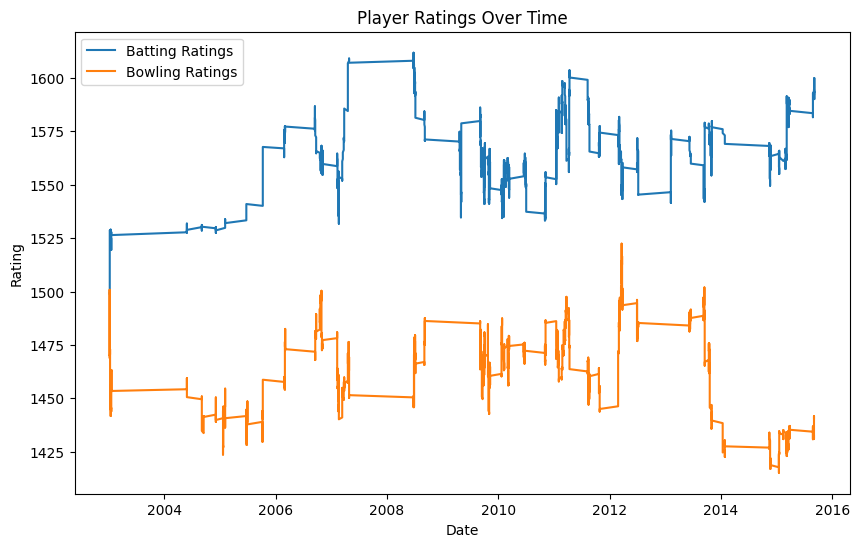

In [96]:
import matplotlib.pyplot as plt

# Separate the dates and ratings
batting_dates, batting_ratings = zip(*batting_ratings_player)
bowling_dates, bowling_ratings = zip(*bowling_ratings_player)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the batting ratings
plt.plot(batting_dates, batting_ratings, label='Batting Ratings')

# Plot the bowling ratings
plt.plot(bowling_dates, bowling_ratings, label='Bowling Ratings')

# Add a legend
plt.legend()

# Add title and labels
plt.title('Player Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Rating')

# Show the plot
plt.show()

In [82]:
# find player id with 'Tendulkar' in name
for id, names in player_dict.items():
    for name in names:
        if 'Watson' in name:
            print(id, name)

# kohli ba607b88
# find rating for d2c2b2d5 which is tendulkar
# print(batting_ratings['d2c2b2d5'])

# # find rank for tendulkar, by sorting and finding index
# batsmen_sorted = sorted(batting_ratings.items(), key=lambda x: x[1], reverse=True)
# for i, (player_id, rating) in enumerate(batsmen_sorted):
#     if player_id == 'd2c2b2d5':
#         print(i + 1)
#         break
    

4329fbb5 SR Watson
a670d624 RR Watson


In [20]:
item['innings'][0].keys()

dict_keys(['team', 'overs', 'powerplays'])

In [25]:
item['innings'][0]['overs'][1]

{'over': 1,
 'deliveries': [{'batter': 'Vikramjit Singh',
   'bowler': 'Taskin Ahmed',
   'non_striker': "MP O'Dowd",
   'runs': {'batter': 0, 'extras': 0, 'total': 0}},
  {'batter': 'Vikramjit Singh',
   'bowler': 'Taskin Ahmed',
   'non_striker': "MP O'Dowd",
   'runs': {'batter': 0, 'extras': 0, 'total': 0}},
  {'batter': 'Vikramjit Singh',
   'bowler': 'Taskin Ahmed',
   'non_striker': "MP O'Dowd",
   'runs': {'batter': 0, 'extras': 0, 'total': 0}},
  {'batter': 'Vikramjit Singh',
   'bowler': 'Taskin Ahmed',
   'non_striker': "MP O'Dowd",
   'runs': {'batter': 0, 'extras': 0, 'total': 0},
   'wickets': [{'player_out': 'Vikramjit Singh',
     'fielders': [{'name': 'Shakib Al Hasan'}],
     'kind': 'caught'}]},
  {'batter': 'W Barresi',
   'bowler': 'Taskin Ahmed',
   'extras': {'wides': 1},
   'non_striker': "MP O'Dowd",
   'runs': {'batter': 0, 'extras': 1, 'total': 1}},
  {'batter': 'W Barresi',
   'bowler': 'Taskin Ahmed',
   'non_striker': "MP O'Dowd",
   'runs': {'batter': 0, 

In [29]:
item['info']['registry']['people']

{'A Dutt': '803dbf1d',
 'BFW de Leede': 'fc4375ef',
 'CB Gaffaney': 'd5ac41d8',
 'CN Ackermann': 'e734d090',
 'HDPK Dharmasena': '323e4c16',
 'JJ Crowe': '2e760301',
 'JS Wilson': 'd7f3b72f',
 'LV van Beek': '782fb776',
 'Liton Das': '0404d43c',
 "MP O'Dowd": 'b699df47',
 'Mahedi Hasan': '9dad0f2e',
 'Mahmudullah': 'bf1d7d3e',
 'Mehedi Hasan Miraz': 'c58b0108',
 'Mushfiqur Rahim': 'a94e08ea',
 'Mustafizur Rahman': '0a8fce53',
 'Nazmul Hossain Shanto': '1274d7ab',
 'P Wilson': '68304a36',
 'PA van Meekeren': '4557dc54',
 'SA Edwards': 'b59db04f',
 'SA Engelbrecht': '81a0e294',
 'Shakib Al Hasan': '7dc35884',
 'Shariz Ahmad': '7595b47f',
 'Shoriful Islam': 'bb34fd31',
 'Tanzid Hasan': '80fe764d',
 'Taskin Ahmed': 'ef18b66e',
 'Vikramjit Singh': '2a9eee66',
 'W Barresi': '0d677597'}